<div>
<h1>Funcion Exponencial</h1> 
</div>

<p>
En este cuaderno, repasamos algunas propiedades de la funcion exponencial compleja. La misma juega un rol importante en la definicion de la transformada de Fourier, ver la Seccion 2.3.2 de <a href="http://www.music-processing.de">[Müller, FMP, Springer 2015]</a>.
</p> 

## Serie de Potencias

La funcion exponencial compleja $\exp:\mathbb{C}\to \mathbb{C}$ se define a traves de la serie de potencias 

$$\mathrm{exp}(c) = e^c := \sum_{n=0}^{\infty} \frac{c^n}{n!} = 1 + c + \frac{c^2}{1 \cdot 2} + \frac{c^3}{1 \cdot 2 \cdot 3} + \dots$$

para $c\in\mathbb{C}$. Esta definicion consiste en una extension de la funcion exponencial real, donde la variable real se reemplaza por una compleja.
La siguiente implementacion produce una aproximacion por serie de potencias al considerar solo los primeros $N$ terminos, quedadndo establecido por el parametro $N\in\mathbb{N}$. En el caso $c=1$, se obtiene una aproximacion para el numero $e$. 

In [2]:
import numpy as np

def exp_power_series(c,N):
    
    """Compute power series for exponential function
    Args:
        c: Complex number
        N: Number of summands used for approximation
    Returns:
        exp_c: Approximation of exp(c)
    """ 
    
    exp_c = 1
    c_power = 1
    nfac = 1
    for n in range(1,N):
        nfac *= n
        c_power *= c 
        exp_c += c_power / nfac
    return exp_c

c=1
print('Aproximacion (N=1): ',exp_power_series(c,1))
print('Aproximacion (N=2): ',exp_power_series(c,2))
print('Aproximacion (N=4): ',exp_power_series(c,4))
print('Aproximacion (N=8): ',exp_power_series(c,8))
print('Aproximacion (N=12):',exp_power_series(c,12))
print('Numpy:              ',np.exp(c))

Aproximacion (N=1):  1
Aproximacion (N=2):  2.0
Aproximacion (N=4):  2.6666666666666665
Aproximacion (N=8):  2.7182539682539684
Aproximacion (N=12): 2.718281826198493
Numpy:               2.718281828459045


## Formula de Euler

La formula de Euler brinda una relacion entre las funciones exponencial compleja, seno y coseno:

$$\mathrm{exp}(c) = \cos(c) + i\sin(c)$$

para $c\in\mathbb{C}$. En particular, adquiere relevancia el caso $c = i\gamma$, donde $\gamma\in\mathbb{R}$. En este caso, la formula de Euler se reduce a

$$\mathrm{exp}(i\gamma) = \cos(\gamma) + i\sin(\gamma),$$

En efecto, partiendo de las funciones reales seno y coseno, a menudo se define $\mathrm{exp}(i\gamma)$ por medio de la identidad de Euler (en lugar de recurrir a la serie de potencias). 

## Propiedades Basicas

La funcion exponencial presenta las siguientes propiedades:

\begin{eqnarray}
\exp(i\gamma) & = & \exp(i(\gamma+2\pi)) \\
|\exp(i\gamma)|  & = & 1 \\
\overline{\exp(i\gamma)} & = & \exp(-i\gamma) \\
\exp(i(\gamma_1+\gamma_2)) & = & \exp(i\gamma_1) \exp(i\gamma_2) \\
\frac{d\exp(i\gamma)}{d\gamma} & = & i\exp(i\gamma)
\end{eqnarray}

En particular, notamos que los valores complejos $\mathrm{exp}(i\gamma)$ yacen en el circulo unitario del plano complejo para todo $\gamma\in\mathbb{R}$. Debido a la periodicidad, es suficiente considerar $\gamma\in[0,2\pi)$. De hecho, $\gamma$ codifica el angulo (en radianes) del numero complejo $c = \mathrm{exp}(i\gamma)$, donde $|c|=1$. La siguiente visualizacion ilustra el cambio de los valores $\mathrm{exp}(i\gamma)$ al incrementar el angulo $\gamma$ de $0$ a $2\pi$:

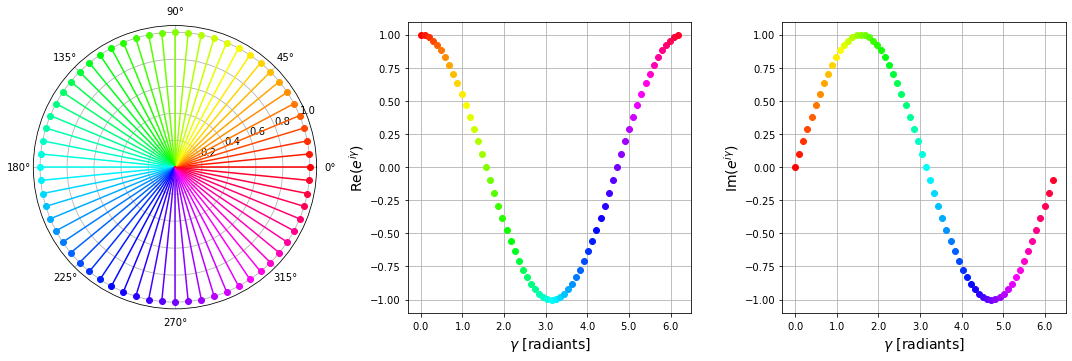

In [3]:
from matplotlib import pyplot as plt
from matplotlib import ticker 
%matplotlib inline

cmap = plt.cm.get_cmap('hsv') # hsv is a circular color map

N = 64

fig = plt.figure(figsize=(5*3,5))
ax1 = fig.add_subplot(1,3,1,projection='polar')
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)

for i in range(N):
    gamma = 2*np.pi*i/N
    c = np.exp(1j*gamma)
    color = cmap(i/N)
    ax1.plot([0,np.angle(c)],[0,np.abs(c)],color=color)
    ax1.plot(np.angle(c),np.abs(c),'o',color=color)
    ax2.plot(gamma,np.real(c),'o',color=color)
    ax3.plot(gamma,np.imag(c),'o',color=color)
    
ax2.grid()
ax2.set_xlabel('$\gamma$ [radiants]',fontsize=14)
ax2.set_ylabel('$\mathrm{Re}(e^{i \gamma})$',fontsize=14)
ax2.xaxis.set_major_formatter(ticker.FormatStrFormatter('$%s$')) 

ax3.grid()
ax3.set_xlabel('$\gamma$ [radiants]',fontsize=14)
ax3.set_ylabel('$\mathrm{Im}(e^{i \gamma})$',fontsize=14)
ax3.xaxis.set_major_formatter(ticker.FormatStrFormatter('$%s$')) 
plt.tight_layout()

## Raíces de la Unidad

Sea $N \in \mathbb{N}_{>0}$ un entero positivo. Diremos que el numero complejo $\rho \in \mathbb{C}$ es una **raiz $N$-ésima de la unidad** si $\rho^N = 1$. 
Es posible comprobar que hay exactamente $N$ diferentes raices $N$-ésimas de la unidad. Adicionalmente, si alguna satisface $\rho^n \neq 1$ para todo $n\in [1:N-1]$, se trata de la $N$-ésima raiz **primitiva** de la unidad.

Haciendo uso de las propiedades vistas, se constata con facilidad que los numeros complejos 

$$\rho_N^n:=\exp(2 \pi n i / N), \quad n=0,1,2,...,N-1$$

constituyen tales raices $N$-ésimas de la unidad puesto que cada una de ellas satisface $[\rho_N^n]^N = 1$.

<u>NOTA:</u> el numero $\rho=\exp(2 \pi n i / N)$ es una $N$-ésima raiz primitiva de la unidad si el maximo comun divisor de $n$ y $N$ equivale a $1$.

El siguiente grafico muestra las $N$-ésimas raices de la unidad para diferentes valores de $N \in \mathbb{N}_{>0}$. Las raices primitivas se indican en <font color='red'>rojo</font>. 

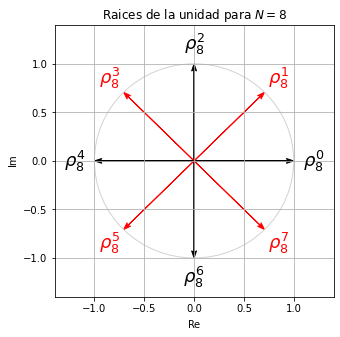

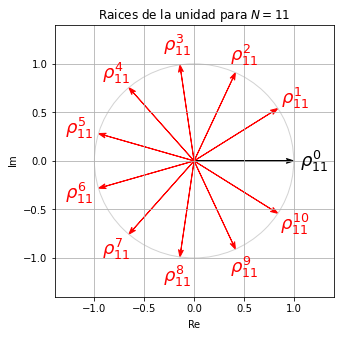

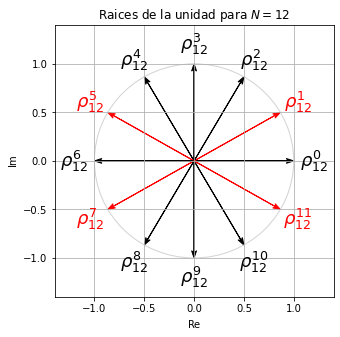

In [4]:
from math import gcd
import sys
import os
sys.path.append(os.path.join('..','LibUNTREF'))
import C2_Complex

# NOTA:
# sys.path: yields the list of directories which specifies the search path for modules.
# sys.path.append: extends that list to include new file paths.
# import C2_Complex: the interpreter searches for C2_Complex.py in that list.
# math.gcd(x,y): computes the greatest common divisor of x and y.

def plot_root_unity(N,figsize=(5,5)): 
    root_unity = np.exp(2j*np.pi/N)
    root_unity_power = 1

    fig,ax = plt.subplots(figsize=figsize)
    plt.grid()  
    plt.xlim([-1.4,1.4])
    plt.ylim([-1.4,1.4])
    plt.xlabel('$\mathrm{Re}$')
    plt.ylabel('$\mathrm{Im}$')
    plt.title('Raices de la unidad para $N=%d$'%N)

    for n in range(0,N):
        colorPlot = 'r' if gcd(n,N) == 1 else 'k'
        C2_Complex.plot_vector(root_unity_power,color=colorPlot)
        plt.text(np.real(1.2*root_unity_power),np.imag(1.2*root_unity_power), 
                 r'$\rho_{%s}^{%s}$'%(N,n),size='18', 
                 color=colorPlot,ha='center',va='center')
        root_unity_power *= root_unity

    circle_unit = plt.Circle((0,0),1,color='lightgray',fill=0)   
    ax.add_artist(circle_unit)

plot_root_unity(N=8)    
plot_root_unity(N=11)
plot_root_unity(N=12)

In [5]:
from IPython.core.display import HTML
css_file = '.././styles/numericalmoocstyle.css'
HTML(open(css_file, 'r').read())